# Displaying Caliper, Calculated Openhole Volume and Gamma Ray Plot

Openhole volume calculation in well logs is a method used to estimate the volume of open space or voids in the subsurface rock formations that are being drilled. It is important to know the exact openhole volume, as it is required for calculating the amount of cement that needs to be pumped behind the casing to secure the wellbore. Caliper is a tool that measures the diameter of the borehole, which is important for the openhole volume calculation, as the diameter is not always the same as the drill bit diameter. Gamma ray is another important tool, as it helps identify and differentiate between various rock formations, allowing for a more accurate estimation of the openhole volume.

The plot below visualizes the openhole volume that has been calculated and other parameters on the data for a well situated in Luxembourg. 

## Python Code

Two python libraries were utilized in this plot, specifically lasio and matplotlib.

The "lasio" library is often used to read and write well data files in the Log ASCII Standard (LAS) format, which is a common way of storing well logging data in the oil and gas industry. Meanwhile, "matplotlib" is a robust plotting library that lets users create many different types of visualizations in Python.

In [1]:
# Import python libraries
import lasio
import matplotlib.pyplot as plt

The code below reads a LAS file named "caliper.las" using the imported "lasio" library above, and assigns the resulting object to a variable called "las". The ".read()" function of the library is used to read the LAS file, which is passed to it as an argument inside the parentheses. By executing this code, the contents of the "caliper.las" file will be loaded into the "las" object, which can then be used to access and manipulate the well log data in Python.

In [2]:
# Read the LAS file
las = lasio.read('caliper.las')

The first line of the code below creates a new curve called "CAL-in" using the las object that was created earlier. This curve is created by taking the values in the "CAL" curve, which represent the diameter of the wellbore in millimeters, and dividing them by 25.6 to convert them to inches.

Then, the second line of the code below creates a new curve called "VOL" using the las object. This curve represents the openhole volume and is calculated using the values in the "CAL-in" curve that was created earlier, the interval step size, and the mathematical formula for calculating the volume of a cylinder. This is the formula for determining the openhole volume of a well.

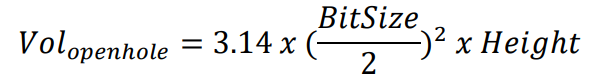

The interval step size is obtained from the well header information stored in the las object. The formula multiplies the square of the diameter by the interval step and 3.14 (the mathematical constant pi) and then divides by 144 to convert from square inches to square feet.

By running this code, two new curves "CAL-in" and "VOL" are added to the existing "las" object, which can be used for further analysis and visualization of the well data.

In [3]:
# Create a new curve for caliper in inches
las['CAL-in'] = las['CAL']/(25.6)

# Create a volume curve
interval_step = las.well['step'].value
las['VOL'] = 3.14 * las['CAL-in'] * las['CAL-in'] * interval_step / 144

Next, the code below sets the parameters for the plot, including which data will be displayed, what their titles will be, and what colors will be used for each track. The tracks variable specifies the data to be plotted, titles sets the labels for each track, and colors defines the colors used for each. Additionally, the variable background_color sets the background color for the column plots to light gray, which is a predefined color in the matplotlib library. You have the freedom to modify the background color as per your preference.

In [4]:
# Define the tracks we wish to plot
tracks = ['CAL-in', 'VOL', 'GR']

# Set track titles
titles = ['CALIPER\n(in)','VOLUME\n(ft3)', 'GAMMA RAY\n(API)']

# Define colors for each track
colors = ['blue', 'red', 'green']

# Define the background color for column plots
background_color = 'lightgray'

Now let's move on to the next step. The written code below defines a dictionary with key-value pairs extracted from a LAS file, which contains information about a well log. The dictionary stores information such as the start and stop depths, step size, null value, well details, and other relevant information. A template string is then defined to create a legend that summarizes the well log information. The legend string is formatted with the values from the dictionary to produce a complete summary of the well log data.

In [5]:
# Define the dictionary with the given key-value pairs
data = {'STRT.M': 100.000,
        'STOP.M': 150.000,
        'STEP.M': 0.100000,
        'NULL.': -999.25,
        'COMP.': 'ALT sa',
        'WELL.': 'Well 123',
        'FLD.': 'North Extension',
        'LOC.': None,
        'SRVC.': 'Wireline Logging Ltd',
        'STAT.': 'Luxembourg',
        'CNTY.': 'Diekirch',
        'DATE.': '24-Jun-2013',
        'API.': None,
        'BIT.IN': 4.5}

# Define a template string for the legend
legend_template = 'Start: {start} m\nStop: {stop} m\nStep: {step} m\nNull: {null}\nCompany: {company}\nWell: {well}\nField: {field}\nLocation: {location}\nService: {service}\nState: {state}\nCounty: {county}\nDate: {date}\nAPI: {api}\nBit: {bit} in.'

# Format the legend string with the values from the dictionary
legend = legend_template.format(start=data['STRT.M'],
                                stop=data['STOP.M'],
                                step=data['STEP.M'],
                                null=data['NULL.'],
                                company=data['COMP.'],
                                well=data['WELL.'],
                                field=data['FLD.'],
                                location=data['LOC.'],
                                service=data['SRVC.'],
                                state=data['STAT.'],
                                county=data['CNTY.'],
                                date=data['DATE.'],
                                api=data['API.'],
                                bit=data['BIT.IN'])

We can interpret this code that creates subplots with one row and multiple columns to display a well log. It sets the y-axis limits for the subplots, iterates through tracks to add a trace for each one, and customizes various plot properties such as colors and labels. The code then calculates the openhole section volume and theoretical section volume, and updates the layout to adjust figure size before displaying the final plot. Hence, the stunning visualization is displayed.

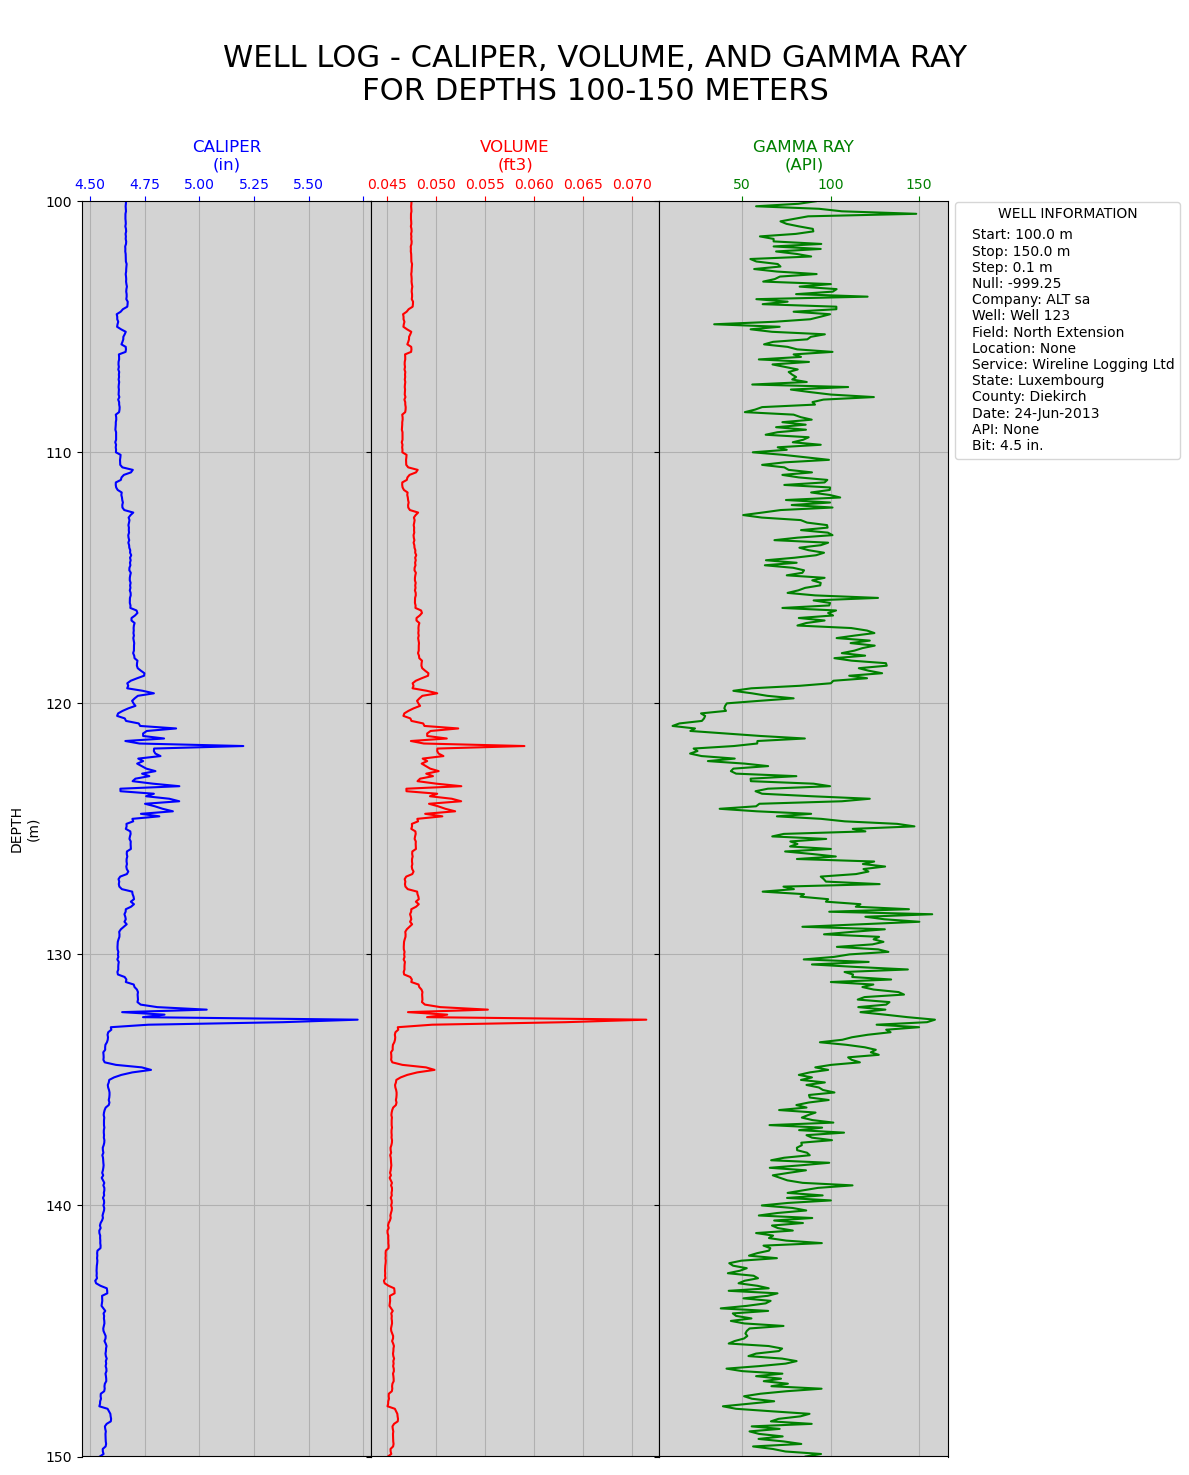

In [6]:
# Create subplots with one row and multiple columns
fig, axs = plt.subplots(1, len(tracks), sharey=True, figsize=(12,15))

# Set y-axis limits for the subplots
ymin = 100
ymax = 150

# Iterate through tracks and add a trace for each one
for i, t in enumerate(tracks):
    # Set the background color for the subplot
    axs[i].set_facecolor(background_color)

    # Add a trace for the current track
    axs[i].plot(las[t], las.depth_m, color=colors[i])
    axs[i].set_title(titles[i],color=colors[i])
    axs[i].invert_yaxis()
    axs[i].set_ylim(ymax, ymin)  # Set y-axis limits
    axs[i].grid(True)
    axs[i].tick_params(axis='x',colors=colors[i])
    axs[i].xaxis.set_ticks_position("top")
    axs[i].xaxis.set_label_position("top")

# Get x-tick labels for current subplot
    xlabels = axs[i].get_xticklabels()

    # Hide x-tick label for value 5.75 in first subplot
    if i == 0:
        for label in xlabels:
            if label.get_text() == '5.75':
                label.set_visible(False)
                
# Display the y-axis label of the plot    
axs[0].set_ylabel("DEPTH\n(m)")

# Add title to the plot
fig.suptitle("\nWELL LOG - CALIPER, VOLUME, AND GAMMA RAY\nFOR DEPTHS 100-150 METERS\n",fontsize=22)

# Calculate openhole section volume
volume_log = las['VOL'].sum()

# Calculate theoretical section volume
depth_start = las.well['STRT'].value
depth_end = las.well['stop'].value
interval = depth_end - depth_start
bit_size = las.well['bit'].value
volume_bit = (3.14 * (bit_size/2)**2 / 144 ) * interval

# Update layout to adjust figure size
plt.legend([legend], handlelength=0, title='WELL INFORMATION',loc='best',bbox_to_anchor=(1,1.005))
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig('Openhole Volume Calculation.jpg',dpi=600)

# Display the plot
plt.show()

To get the computed volume of the log and the volume of the bitsize, we can use the following code to print the result. The written code prints the openhole section volume and theoretical section volume, formatted to display two decimal places. The values for these variables are provided as arguments using the .format() method, where {0:.2f} represents the first argument (volume_log) and {1:.2f} represents the second argument (volume_bit).

In [7]:
print("Volume from log = {0:.2f} , Volume From Bitsize {1:.2f}".format(volume_log,volume_bit))

Volume from log = 23.59 , Volume From Bitsize 5.52


## Feedback Requested: Enhancing the Plot of this Notebook

Thank you so much for reading this notebook. Please don't hesitate to share your thoughts on the code as I value your feedback.